In [1]:
from nn import *
from loss import loss_mapper
from viz import plot_history
from metrics import accuracy
from callbacks import EarlyStopping
from tools import train_test_split, load, save, binary_encoder
from optim import MomentumGradientDescent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('resources/data.csv', index_col=0)

In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [5]:
y, ohe_map = binary_encoder(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=.33, random_state=42)

In [7]:
ohe_map

{0: 'B', 1: 'M'}

In [8]:
X_normed = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

In [9]:
X_test_normed = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

In [10]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer='gd', verbose=True, verbose_step=1)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))

In [11]:
es = EarlyStopping(monitor='val_loss', patience=300)

In [12]:
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)

[    1/10]: loss=0.68174 val_loss=0.68454 accuracy=0.63947 val_accuracy=0.60638 
[    2/10]: loss=0.67169 val_loss=0.67687 accuracy=0.63947 val_accuracy=0.60638 
[    3/10]: loss=0.66107 val_loss=0.66848 accuracy=0.63947 val_accuracy=0.60638 
[    4/10]: loss=0.64589 val_loss=0.65553 accuracy=0.63947 val_accuracy=0.60638 
[    5/10]: loss=0.61890 val_loss=0.63104 accuracy=0.64474 val_accuracy=0.61170 
[    6/10]: loss=0.56899 val_loss=0.58408 accuracy=0.72105 val_accuracy=0.67021 
[    7/10]: loss=0.48941 val_loss=0.50786 accuracy=0.87632 val_accuracy=0.83511 
[    8/10]: loss=0.39538 val_loss=0.41731 accuracy=0.94474 val_accuracy=0.90426 
[    9/10]: loss=0.31343 val_loss=0.33836 accuracy=0.95789 val_accuracy=0.92553 
[   10/10]: loss=0.25341 val_loss=0.28047 accuracy=0.96053 val_accuracy=0.92021 


In [13]:
accuracy(y_test, model.predict(X_test_normed))

0.9202127659574468

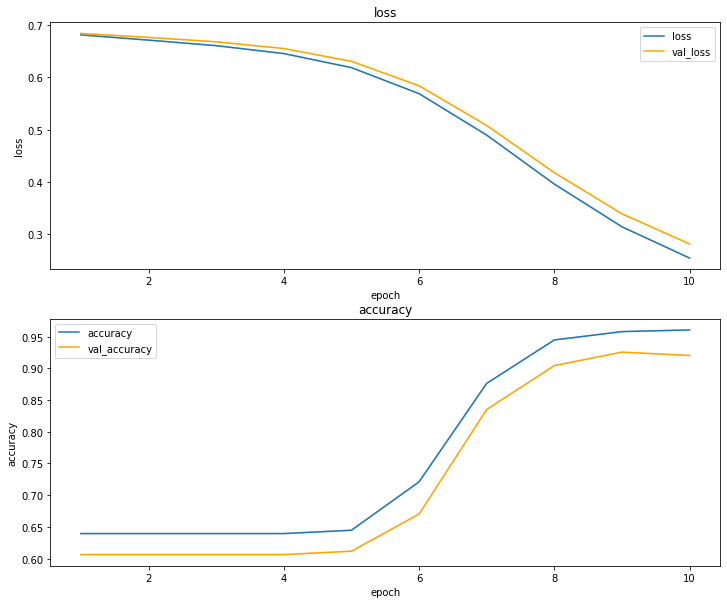

In [14]:
plot_history(h)

[    1/10]: loss=0.67887 val_loss=0.68196 accuracy=0.63947 val_accuracy=0.60638 
[    2/10]: loss=0.66429 val_loss=0.67014 accuracy=0.63947 val_accuracy=0.60638 
[    3/10]: loss=0.64501 val_loss=0.65357 accuracy=0.63947 val_accuracy=0.60638 
[    4/10]: loss=0.61342 val_loss=0.62509 accuracy=0.64474 val_accuracy=0.61170 
[    5/10]: loss=0.55926 val_loss=0.57471 accuracy=0.72105 val_accuracy=0.65957 
[    6/10]: loss=0.47729 val_loss=0.49677 accuracy=0.86842 val_accuracy=0.83511 
[    7/10]: loss=0.38252 val_loss=0.40557 accuracy=0.94474 val_accuracy=0.90426 
[    8/10]: loss=0.30113 val_loss=0.32670 accuracy=0.96053 val_accuracy=0.92553 
[    9/10]: loss=0.24289 val_loss=0.26996 accuracy=0.96053 val_accuracy=0.93085 
[   10/10]: loss=0.20315 val_loss=0.23093 accuracy=0.95789 val_accuracy=0.93085 


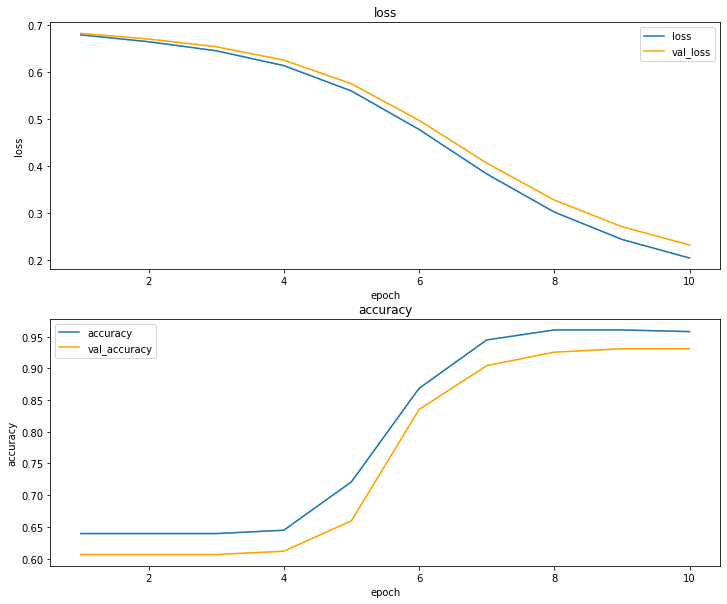

In [15]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer=MomentumGradientDescent(bias_correction=True), verbose=True, verbose_step=1)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)

[    1/10]: loss=0.68186 val_loss=0.68454 accuracy=0.63947 val_accuracy=0.60638 
[    2/10]: loss=0.67165 val_loss=0.67676 accuracy=0.63947 val_accuracy=0.60638 
[    3/10]: loss=0.66089 val_loss=0.66824 accuracy=0.63947 val_accuracy=0.60638 
[    4/10]: loss=0.64583 val_loss=0.65541 accuracy=0.63947 val_accuracy=0.60638 
[    5/10]: loss=0.62004 val_loss=0.63210 accuracy=0.64211 val_accuracy=0.60638 
[    6/10]: loss=0.57369 val_loss=0.58875 accuracy=0.67632 val_accuracy=0.64894 
[    7/10]: loss=0.49883 val_loss=0.51735 accuracy=0.83684 val_accuracy=0.79255 
[    8/10]: loss=0.40517 val_loss=0.42715 accuracy=0.92632 val_accuracy=0.89362 
[    9/10]: loss=0.32009 val_loss=0.34504 accuracy=0.95526 val_accuracy=0.92553 
[   10/10]: loss=0.25753 val_loss=0.28456 accuracy=0.96053 val_accuracy=0.92553 


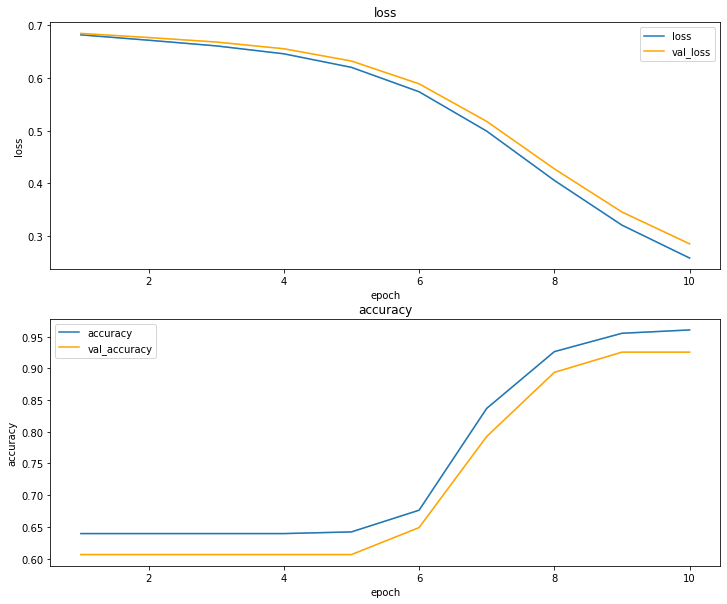

In [16]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer=MomentumGradientDescent(bias_correction=False), verbose=True, verbose_step=1)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)

[   50/1000]: loss=0.04813 val_loss=0.08388 accuracy=0.98421 val_accuracy=0.96809 
[  100/1000]: loss=0.03248 val_loss=0.08163 accuracy=0.99211 val_accuracy=0.95745 
[  150/1000]: loss=0.02355 val_loss=0.08968 accuracy=0.99211 val_accuracy=0.96277 
[  200/1000]: loss=0.01797 val_loss=0.09873 accuracy=0.99737 val_accuracy=0.96809 
[  250/1000]: loss=0.01421 val_loss=0.10772 accuracy=0.99737 val_accuracy=0.96809 
[  300/1000]: loss=0.01157 val_loss=0.11605 accuracy=0.99737 val_accuracy=0.96809 
[  350/1000]: loss=0.00962 val_loss=0.12342 accuracy=1.00000 val_accuracy=0.96809 
[  400/1000]: loss=0.00816 val_loss=0.13068 accuracy=1.00000 val_accuracy=0.96809 
[  450/1000]: loss=0.00704 val_loss=0.13755 accuracy=1.00000 val_accuracy=0.96809 
[  500/1000]: loss=0.00614 val_loss=0.14408 accuracy=1.00000 val_accuracy=0.96809 
[  550/1000]: loss=0.00542 val_loss=0.15019 accuracy=1.00000 val_accuracy=0.96809 
[  600/1000]: loss=0.00484 val_loss=0.15548 accuracy=1.00000 val_accuracy=0.96809 
[  6

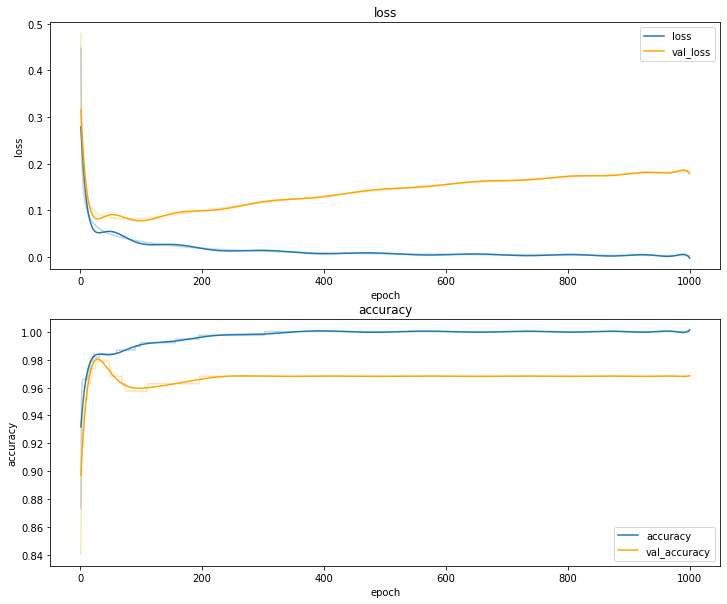

In [17]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer=MomentumGradientDescent(bias_correction=True, beta=.7),
                      verbose=True, verbose_step=50)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=1000, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)

[   50/1000]: loss=0.06072 val_loss=0.08557 accuracy=0.98421 val_accuracy=0.97872 
[  100/1000]: loss=0.04872 val_loss=0.08572 accuracy=0.98684 val_accuracy=0.98404 
[  150/1000]: loss=0.04170 val_loss=0.09248 accuracy=0.98947 val_accuracy=0.97872 
[  200/1000]: loss=0.03624 val_loss=0.10142 accuracy=0.98947 val_accuracy=0.96809 
[  250/1000]: loss=0.03171 val_loss=0.11206 accuracy=0.99211 val_accuracy=0.96809 
[  300/1000]: loss=0.02803 val_loss=0.12352 accuracy=0.99211 val_accuracy=0.96809 
[  350/1000]: loss=0.02518 val_loss=0.13374 accuracy=0.99211 val_accuracy=0.96809 
[  400/1000]: loss=0.02301 val_loss=0.14193 accuracy=0.99211 val_accuracy=0.96809 
[  450/1000]: loss=0.02133 val_loss=0.14852 accuracy=0.99211 val_accuracy=0.96809 
[  500/1000]: loss=0.01997 val_loss=0.15416 accuracy=0.99211 val_accuracy=0.96809 
[  550/1000]: loss=0.01889 val_loss=0.15834 accuracy=0.99211 val_accuracy=0.96809 
[  600/1000]: loss=0.01800 val_loss=0.16184 accuracy=0.99211 val_accuracy=0.96809 
[  6

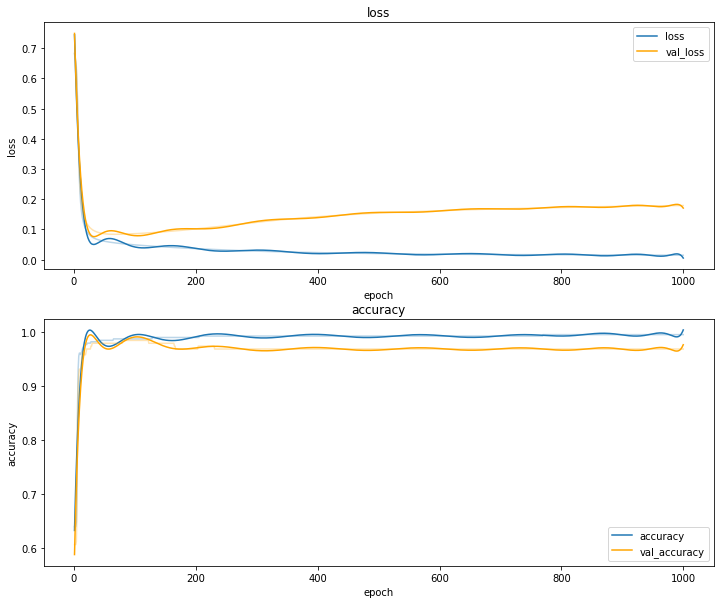

In [18]:
lr = AnnealingLR(lr=0.05)
optim = MomentumGradientDescent(learning_rate=lr, bias_correction=True)
model = NeuralNetwork(loss='binary_crossentropy', optimizer=optim,
                      verbose=True, verbose_step=50)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=1000, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)

[   50/1000]: loss=0.05893 val_loss=0.08539 accuracy=0.98421 val_accuracy=0.97872 
[  100/1000]: loss=0.04718 val_loss=0.08816 accuracy=0.98684 val_accuracy=0.98404 
[  150/1000]: loss=0.03892 val_loss=0.10239 accuracy=0.98947 val_accuracy=0.97340 
[  200/1000]: loss=0.03172 val_loss=0.12197 accuracy=0.99211 val_accuracy=0.97340 
[  250/1000]: loss=0.02554 val_loss=0.14768 accuracy=0.99211 val_accuracy=0.97340 
[  300/1000]: loss=0.02120 val_loss=0.16717 accuracy=0.99474 val_accuracy=0.96809 
[  350/1000]: loss=0.01794 val_loss=0.18760 accuracy=0.99474 val_accuracy=0.96809 
[  400/1000]: loss=0.01552 val_loss=0.20256 accuracy=0.99474 val_accuracy=0.96809 
[  450/1000]: loss=0.01355 val_loss=0.21893 accuracy=0.99737 val_accuracy=0.96809 
[  500/1000]: loss=0.01198 val_loss=0.22975 accuracy=0.99737 val_accuracy=0.96809 
[  550/1000]: loss=0.01065 val_loss=0.24233 accuracy=0.99737 val_accuracy=0.96809 
[  600/1000]: loss=0.00958 val_loss=0.25160 accuracy=0.99737 val_accuracy=0.97340 
[  6

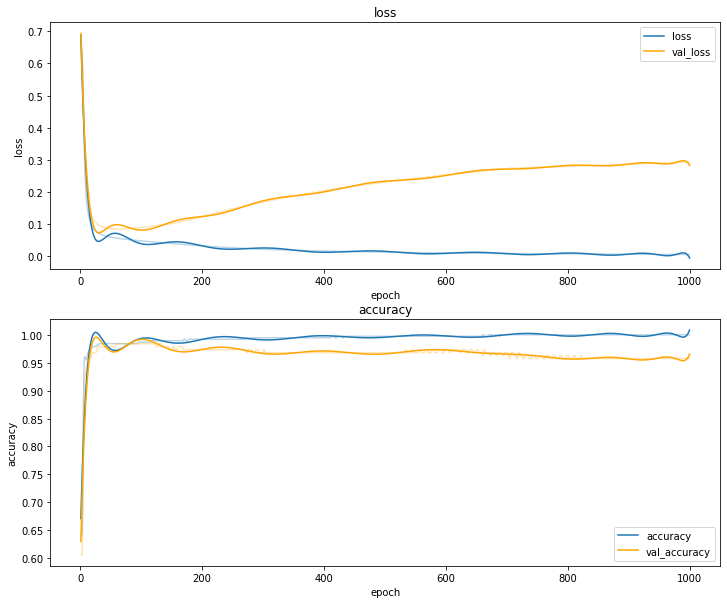

In [20]:
lr = CircluarLR(lr=0.05)
optim = MomentumGradientDescent(learning_rate=lr, bias_correction=True)
model = NeuralNetwork(loss='binary_crossentropy', optimizer=optim,
                      verbose=True, verbose_step=50)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=1000, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)